In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
uploaded = files.upload()
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.head())


Saving Mall_Customers.csv to Mall_Customers (1).csv
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


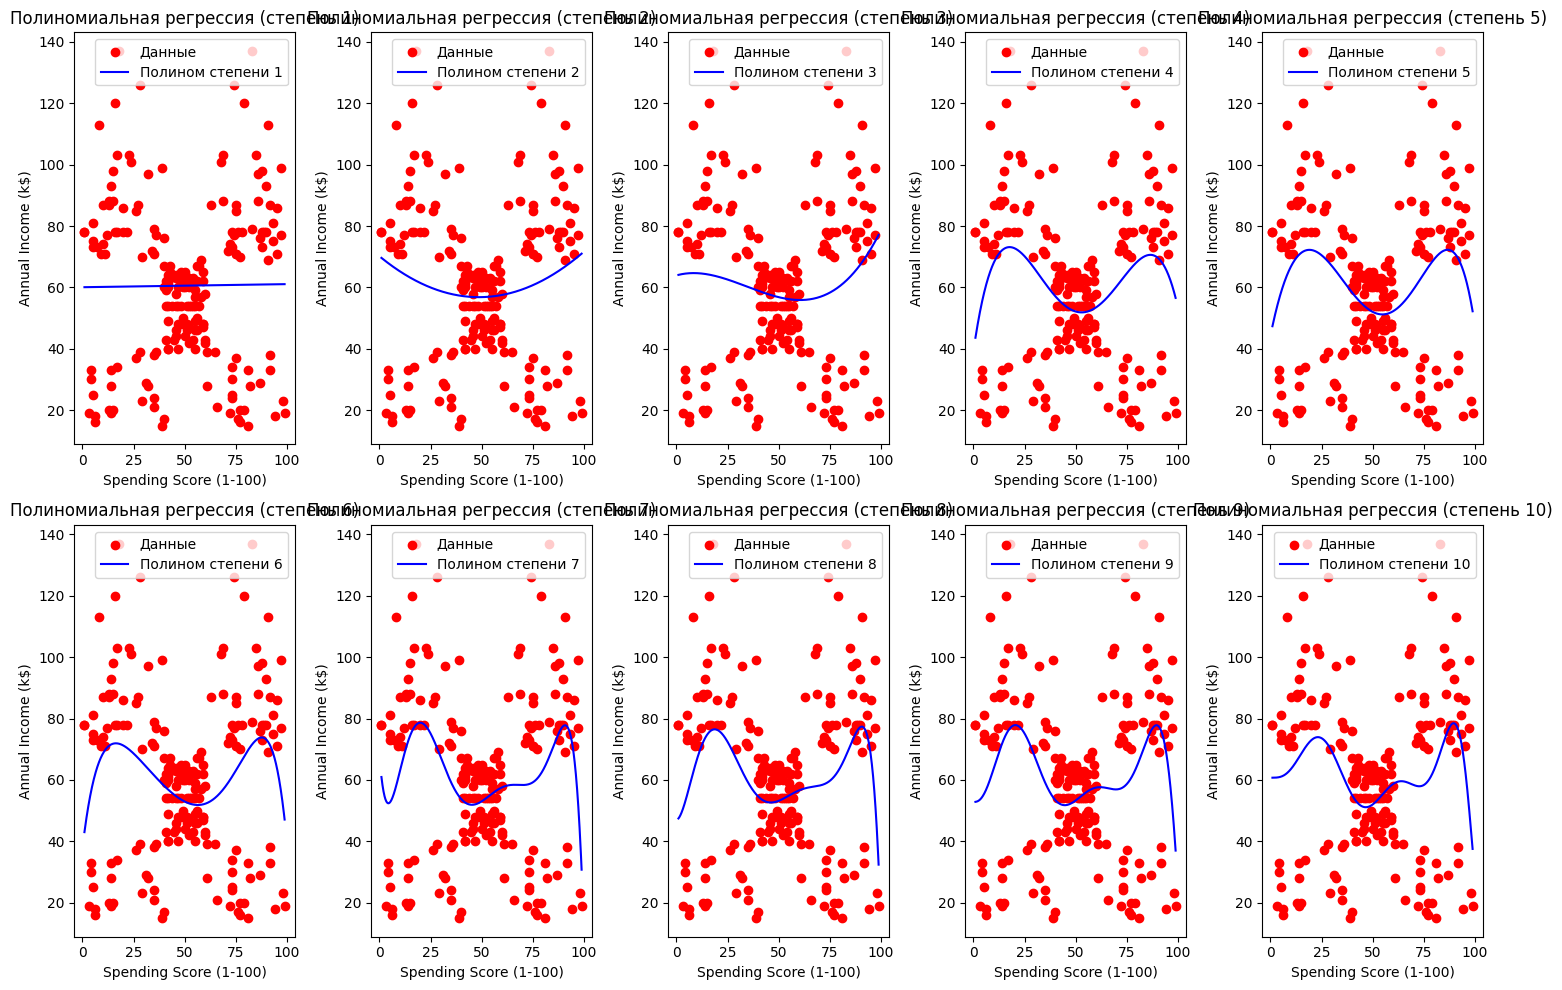

In [2]:
# Признаки и целевая переменная
X = dataset[['Spending Score (1-100)']].values  # Признаки
y = dataset['Annual Income (k$)'].values       # Целевая переменная

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Список степеней полинома
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Настройка размера графика
plt.figure(figsize=(15, 10))

# Цикл по степеням полинома
for i, degree in enumerate(degrees, 1):
    # Создание полиномиальных признаков
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)

    # Обучение модели полиномиальной регрессии
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly, y)

    # Генерация кривой для текущей модели
    X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1).reshape(-1, 1)
    y_pred = lin_reg_poly.predict(poly_reg.transform(X_grid))

    # Построение графика
    plt.subplot(2, 5, i)
    plt.scatter(X, y, color='red', label='Данные')
    plt.plot(X_grid, y_pred, color='blue', label=f'Полином степени {degree}')
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.xlabel('Spending Score (1-100)')
    plt.ylabel('Annual Income (k$)')
    plt.legend()

# Корректировка расположения графиков
plt.tight_layout()
plt.show()


In [3]:
# Импорт метрик
from sklearn.metrics import mean_squared_error, r2_score

print("Анализ метрик для различных степеней полинома:")

# Перебор списка степеней полинома
for degree in degrees:
    # Создание объекта для полиномиальных признаков с текущей степенью
    poly_reg = PolynomialFeatures(degree=degree)
    # Преобразование входных данных X в полиномиальные признаки
    X_poly = poly_reg.fit_transform(X)

    # Обучение модели линейной регрессии на полиномиальных признаках
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly, y)

    # Предсказания модели на преобразованных данных
    y_pred = lin_reg_poly.predict(X_poly)

    # Расчет метрик
    mse = mean_squared_error(y, y_pred)  # Среднеквадратичная ошибка
    r2 = r2_score(y, y_pred)  # Коэффициент детерминации R^2

    # Вывод результатов
    print(f"Степень полинома: {degree}")
    print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
    print(f"Коэффициент детерминации (R^2): {r2:.2f}\n")


Анализ метрик для различных степеней полинома:
Степень полинома: 1
Среднеквадратичная ошибка (MSE): 686.32
Коэффициент детерминации (R^2): 0.00

Степень полинома: 2
Среднеквадратичная ошибка (MSE): 670.14
Коэффициент детерминации (R^2): 0.02

Степень полинома: 3
Среднеквадратичная ошибка (MSE): 666.26
Коэффициент детерминации (R^2): 0.03

Степень полинома: 4
Среднеквадратичная ошибка (MSE): 630.03
Коэффициент детерминации (R^2): 0.08

Степень полинома: 5
Среднеквадратичная ошибка (MSE): 628.80
Коэффициент детерминации (R^2): 0.08

Степень полинома: 6
Среднеквадратичная ошибка (MSE): 627.24
Коэффициент детерминации (R^2): 0.09

Степень полинома: 7
Среднеквадратичная ошибка (MSE): 606.31
Коэффициент детерминации (R^2): 0.12

Степень полинома: 8
Среднеквадратичная ошибка (MSE): 610.72
Коэффициент детерминации (R^2): 0.11

Степень полинома: 9
Среднеквадратичная ошибка (MSE): 610.45
Коэффициент детерминации (R^2): 0.11

Степень полинома: 10
Среднеквадратичная ошибка (MSE): 621.03
Коэффициен